# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_absolute_error

### Загрузка данных

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train.csv', parse_dates=['date'])

train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
print( 'Уникальные значения даты: ', len(train['date'].unique()))

print('Длина массива: ', len(train['date']))

Уникальные значения даты:  16860
Длина массива:  16860


Установим индекс на дату

In [4]:
train = train.set_index(['date'])

In [5]:
test = pd.read_csv('/datasets/gold_recovery_test.csv', parse_dates=['date'])

test.head()


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
print( 'Уникальные значения даты: ', len(test['date'].unique()))

print('Длина массива: ', len(test['date']))

Уникальные значения даты:  5856
Длина массива:  5856


In [7]:
test = test.set_index(['date'])

In [8]:
full = pd.read_csv('/datasets/gold_recovery_full.csv', parse_dates=['date'])

full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [9]:
print( 'Уникальные значения даты: ', len(full['date'].unique()))

print('Длина массива: ', len(full['date']))

Уникальные значения даты:  22716
Длина массива:  22716


In [10]:
full = full.set_index(['date'])

In [11]:
train.columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
ок, данные на базе)

Загруженные набор данных отличаются размером - длиной фич. Уточним их значение

### Каких фичей (столбцов) нет в тесте?

In [12]:
diff_col = set(train.columns) - set(test.columns)
diff_col

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [13]:
train[diff_col].describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
rougher.output.concentrate_sol,16698.0,25.388996,10.400528,0.000000e+00,24.792988,28.797785,31.542677,4.008999e+01
primary_cleaner.output.concentrate_au,16778.0,29.164596,10.983718,0.000000e+00,29.631129,32.648867,35.011318,4.593393e+01
rougher.output.concentrate_au,16778.0,17.401541,6.921875,0.000000e+00,17.443663,19.644663,21.224486,2.852281e+01
final.output.tail_au,16794.0,2.687512,1.272757,0.000000e+00,2.172953,2.781132,3.416936,9.789625e+00
primary_cleaner.output.tail_sol,16579.0,6.746209,2.999423,0.000000e+00,5.530088,7.380058,8.728101,2.062083e+01
secondary_cleaner.output.tail_pb,16764.0,5.320902,3.191103,0.000000e+00,3.466609,5.164745,7.562139,1.704250e+01
rougher.output.recovery,14287.0,82.394201,15.096808,0.000000e+00,79.818372,85.235997,90.131691,1.000000e+02
rougher.calculation.floatbank10_sulfate_to_au_feed,16833.0,3784.836088,70887.196448,-2.023459e+06,2502.307799,2854.640785,3644.407648,6.211433e+06
primary_cleaner.output.concentrate_sol,16224.0,9.171453,4.901822,0.000000e+00,6.477601,9.295954,12.747802,2.228085e+01
primary_cleaner.output.concentrate_ag,16778.0,7.422640,3.105117,0.000000e+00,6.612584,7.997143,9.399463,1.608163e+01


<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
В общем, да,
В тестовой выборке недоступны некоторые расчетные (calculation) и выходные (output) характеристики процесса, т.к. их невозможно получить/измерить во время выполнения технологического процесса. 
</font>

Отсутствие некоторых столбцов (output признаков) можно объяснить тем, что это целевые признаки, которые нужно как раз проверить на полной выборке. Вдобавок многие из них относятся не к целевому значению концентрата.

### Напишем функцию для расчета эффективности обогащения

In [14]:
def recovery(C, F, T):
    
    numerator = C*(F-T)
    denumenator = F*(C-T)
    
    recovery = (numerator / denumenator) * 100
    
    #чтобы избежать слишком больших и маленьких значений 
    
    recovery[recovery<0] = np.nan
    recovery[recovery>100] = np.nan
    
    return recovery

In [15]:
t,f,c = train['rougher.output.tail_au'], train['rougher.input.feed_au'], train['rougher.output.concentrate_au']
rec = recovery(c, f, t)

(len(rec), rec.isna().sum())

(16860, 2573)

In [16]:
rec.describe()

count    14287.000000
mean        82.394201
std         15.096808
min         -0.000000
25%         79.818372
50%         85.235997
75%         90.131691
max        100.000000
dtype: float64

Объем данных 16860 строчек (соответсвует длине исходного трейна), объем пустых (выбиващихся значений) - 2573 строчки.

Посмотрим на соотнесение и расчитаем MAE:

**Заполним пропуски нулями и рассчитаем MAE**

In [17]:
rec = rec.fillna(0)

mean_absolute_error(train['rougher.output.recovery'].fillna(0),
                    rec.fillna(0))

8.00350954615662e-15

In [18]:
train['rougher.output.recovery'].isna().sum()

2573

In [19]:
train['rougher.output.recovery'].fillna(recovery(train['rougher.output.tail_au'], train['rougher.input.feed_au'], train['rougher.output.concentrate_au'])).isna().sum()

2573

Средняя абсолютная ошибка очень мала, поэтому у нас есть основания считать, что recovery в трейне посчитан верно.

### Предобработка данных и отбор признаков

В связи с тем, что в обучающей выборке у нас имеются некоторые фичи, которых нет в тесте, то мы имеем право опустить их в связи с бесполезностью эти фичей - их нельзя проверить

In [20]:
X_train = train[test.columns]
X_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [21]:
X_train.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

Заметим, что таким способом мы избавимся от целевых признаков на этапе флотации и очистки, а также от состояния некоторых объектов.

Будем считать, что таким образом мы сократили количество признаков.





# 2. Анализ данных

**Логично предположить, что процессы флотации и очистки протекают независимо друг от друга, соответственно, мы имеем право разделить их на две независимые выборки. Соответственно, мы получим 2 независимых датасета - каждый со своим целевым признаком:***

In [22]:
X_train = train[test.columns]

In [23]:
rougher_cols = X_train.columns.str.contains('rougher')
X_train_rougher = X_train.loc[:, rougher_cols]
X_test_rougher = test.loc[:, rougher_cols]
y_train_rougher = train[['rougher.output.tail_au', 'rougher.output.concentrate_au']]

In [24]:
final_cols = X_train.columns.str.contains('cleaner')
X_train_cleaner = X_train.loc[:, final_cols]
X_test_cleaner = test.loc[:, final_cols]
y_train_cleaner = train[['final.output.tail_au', 'final.output.concentrate_au']]

In [25]:
y_train_rougher.isna().sum()

rougher.output.tail_au           2249
rougher.output.concentrate_au      82
dtype: int64

А теперь разделим по стадии cleaner

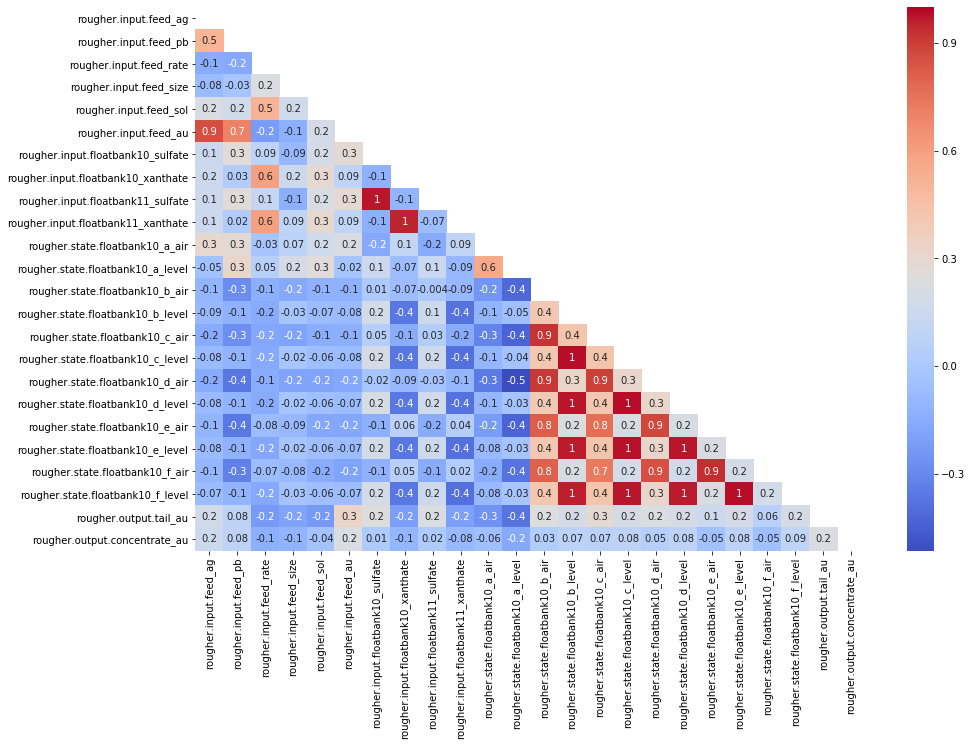

In [26]:
plt.figure(figsize=(15,10))

matrix = np.triu(pd.concat([X_train_rougher, y_train_rougher], axis = 1).dropna().corr())
sns.heatmap(pd.concat([X_train_rougher, y_train_rougher], axis= 1).dropna().corr(), annot=True, fmt='.1g', cmap= 'coolwarm', mask = matrix)

По корреляционной матрице видно, что целевой признак `rougher.output.concentrate_au` сильно коррелирует с подачей металлов. Средняя корреляция между состояниями 10 флотационной камеры. 

В связи с тем, что у нас много высокоррелированных признаков между собой, однако они лишь показывают взаимосвязь экспериментов. С течение времени (индекс) предприятие уже тестировало различные комбинации параметров флотационных камер.

Соответственно, нет большого смысла избавлять от них, если можно провести регуляризацию.

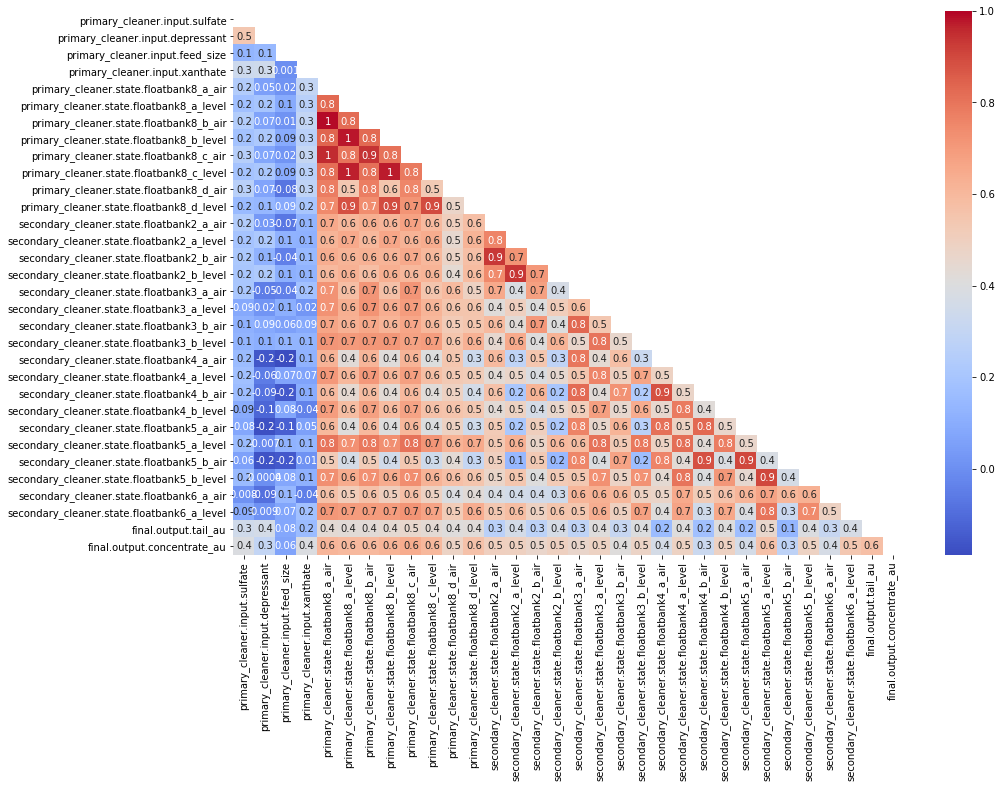

In [27]:
plt.figure(figsize=(15,10))

matrix = np.triu(pd.concat([X_train_cleaner, y_train_cleaner], axis = 1).corr())
sns.heatmap(pd.concat([X_train_cleaner, y_train_cleaner], axis= 1).corr(), annot=True, fmt='.1g', cmap= 'coolwarm', mask = matrix)



С процессом очистки похожая ситуация, однако здесь остаются только признаки состояния флотационных камер (воздух, левел).
Есть признаки, с которыми целевой достаточно сильно коррелирует

### Проведем визуальный анализ отличий распределений признаков для разных металлов после разных процессов очистки/флотации.



In [28]:
def comparing_plot(process, name, metals = ['au', 'ag', 'pb']):
    
    fig, axs = plt.subplots(1, len(process), figsize=(20, 6), constrained_layout=True)
    fig.suptitle(f'Metal concentrations in {name} by stage', fontsize=18)

    for stage, ax in zip(process, axs):
        ax.set_title(stage)
        for metal in metals:        
            cols = train.columns.str.contains(stage+'_'+metal)
            sns_ax = sns.distplot(train.loc[:, cols].dropna(), kde=True, label=metal, ax=ax)    
    plt.legend()

    plt.show()

In [29]:
process = ['rougher.input.feed',
           'rougher.output.concentrate',
           'primary_cleaner.output.concentrate',
           'final.output.concentrate']

process_tail = ['rougher.input.feed',
                'rougher.output.tail',
                'primary_cleaner.output.tail',
                'final.output.tail']



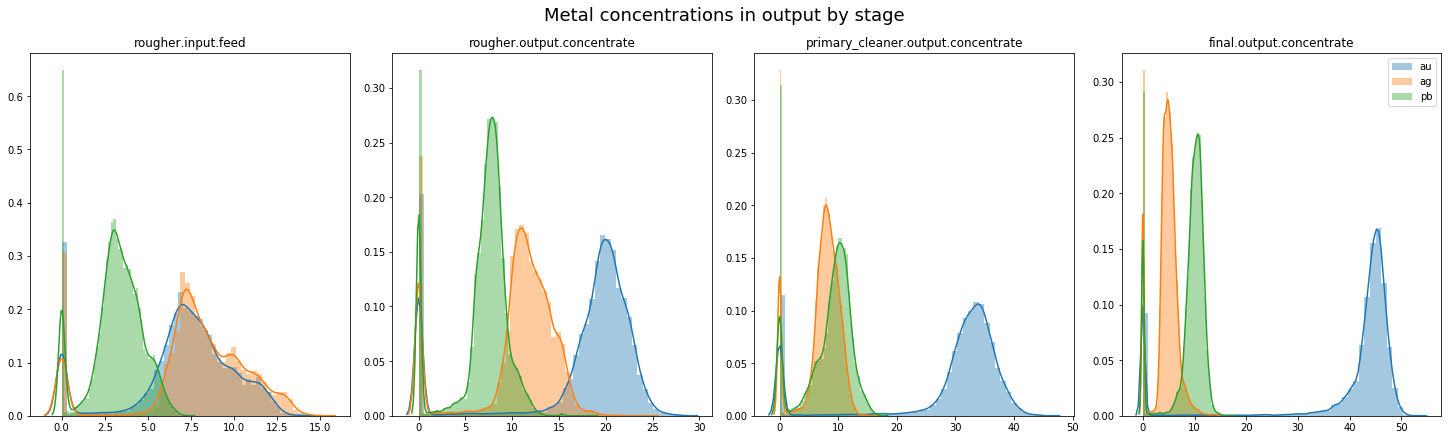

In [30]:
ax = comparing_plot(process, 'output')

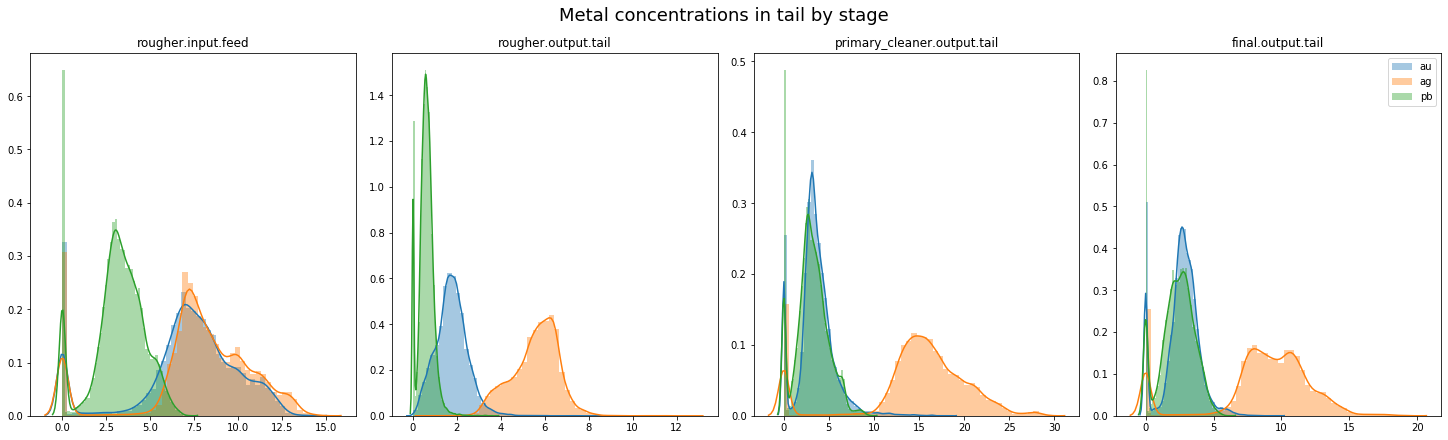

In [31]:
ax1 = comparing_plot(process_tail, 'tail')

По данным графикам заметно, что доля золота на выходе возрастает по мере течения процесса очистки. 

В то же время изменяется доля других металлов, почти в равных пропорциях получаются на выходе после очистки серебро и свинец.

В хвостах же концентрация оставшихся более равномерна между различными металлами.

### Перестроим график для золота для придания динамики в зависимости от стадии

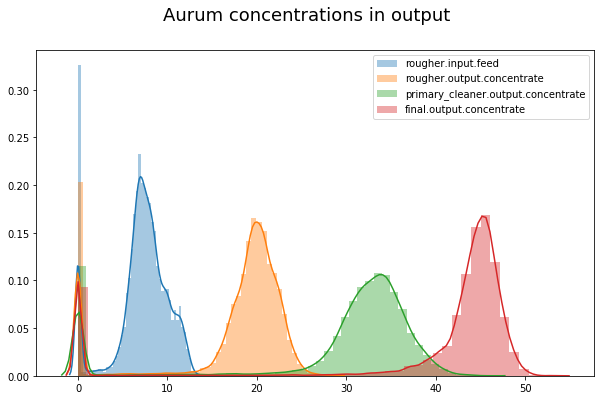

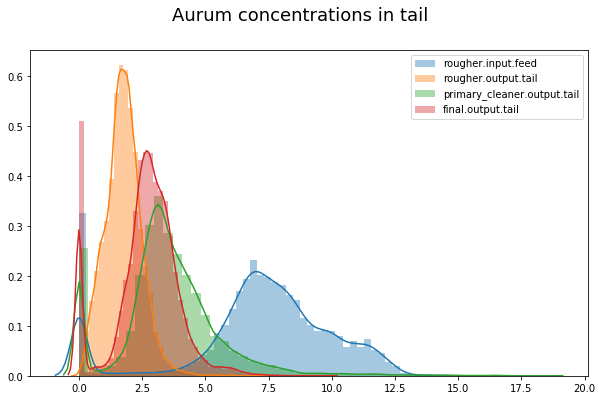

In [32]:
ax = plt.figure(figsize=(10,6))

ax.suptitle('Aurum concentrations in output', fontsize=18)


for stage in process:
    cols = train.columns.str.contains(stage+'_au')
    sns_ax = sns.distplot(train.loc[:, cols].dropna(), kde=True, label=stage)   
plt.legend()


ax = plt.figure(figsize=(10,6))

ax.suptitle('Aurum concentrations in tail', fontsize=18)


for stage in process_tail:
    cols = train.columns.str.contains(stage+'_au')
    sns_ax = sns.distplot(train.loc[:, cols].dropna(), kde=True, label=stage)   
plt.legend()

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
Удачная графика! ОК, золотишко растёт - и это хорошо) (кому-то))

Концентрация золота сильно увеличивается на выходе в процессе очистки и снижается в хвостах в зависимости от стадии

### Рассмотрим размер гранул в трейне и тесте

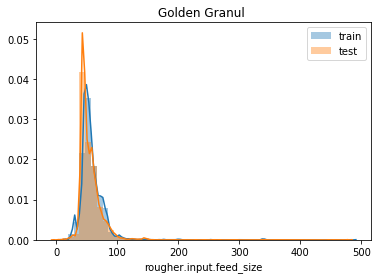

In [33]:

sns.distplot(train['rougher.input.feed_size'].dropna(), label='train').set_title('Golden Granul ')
sns.distplot(test['rougher.input.feed_size'].dropna(), label='test')
plt.legend()

В целом, визуально похоже, что размеры гранул на тесте и в тренировочной выборке совпадают в большинстве случаев. 

### Рассмотрим распределение суммарных концентраций

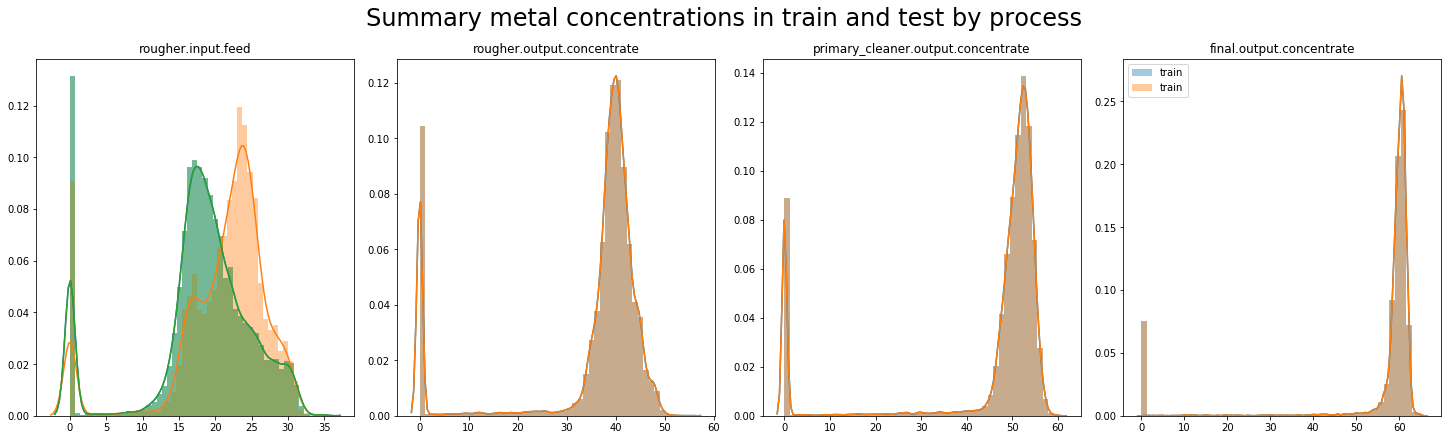

In [34]:
fig, axs = plt.subplots(1, len(process), figsize=(20, 6), constrained_layout=True)
fig.suptitle('Summary metal concentrations in train and test by process', fontsize=24)

for stage, ax in zip(process, axs):
    ax.set_title(stage)
    sum_train = train[stage+ '_ag'] + train[stage+ '_au'] + train[stage+ '_pb'] # трейн
    sns.distplot(sum_train.dropna(), label='train', ax=ax) 
    try:
        sum_test = test[stage+ '_ag'] + test[stage+ '_au'] + test[stage+ '_pb'] # тест
        sns.distplot(sum_test.dropna(), label='test', ax=ax) 
    except KeyError:
        pass
    sns.distplot(sum_train.dropna(), label='train', ax=ax) 

plt.legend()
plt.show()

Аномальные значения концентрации встречаются на каждом этапе - есть нули в переработанном сырье. Скорее всего это та руда, которая изначально не содержала в себе золота.

По смыслу задачи такие значения не несут никакой полезности - их можно опустить.

## Предобработка данных 2.0

Отберем значения, где на вход поступала руда с золотом

In [35]:
train = train[train['rougher.input.feed_au'] > 0]
test = test[test['rougher.input.feed_au'] >0]


train[['rougher.output.recovery']].isna().sum()

rougher.output.recovery    1331
dtype: int64

**Дополнительно изучим пропущенные значения для принятия взвешенного решения по NaN**

In [36]:
train[['rougher.output.concentrate_au', \
       'rougher.input.feed_au','rougher.output.tail_au','rougher.output.recovery']].isna().sum()

rougher.output.concentrate_au       0
rougher.input.feed_au               0
rougher.output.tail_au           1071
rougher.output.recovery          1331
dtype: int64

Попробуем заполнить значения с помощью ранее написанной функции recovery:

In [37]:
train.loc[(train['rougher.output.recovery'].isna()) |\
           (train['rougher.output.recovery'] >= 100) |\
          (train['rougher.output.recovery'] <= 0), 'rougher.output.recovery'] = recovery(train['rougher.output.tail_au'],\
                      train['rougher.input.feed_au'], train['rougher.output.concentrate_au'])

train[['rougher.output.recovery','final.output.recovery']].isna().sum()

rougher.output.recovery    1331
final.output.recovery       279
dtype: int64

Заполнить не удалось - придется дропнуть значения с пропущенной концентрацией за неимением данных

In [38]:
def not_very_correlated_features(data, threshold):
    data_corr = data.corr()
    
    for i in data.columns:
        data_corr = data_corr[(abs(data_corr[i]) < threshold) | (data_corr[i] == 1)]
        
    independent_features_var = data_corr.index.to_list()    
        
    print('Количество обучающих признаков с корреляций меньше {}: {}'.format(threshold, len(independent_features_var)))
    print('Мы сократили количество признаков на {:.2%}'.format(1 - (len(independent_features_var) / len(data.columns))))
    
    return independent_features_var

right_columns = not_very_correlated_features(train[test.columns], 0.9)

Количество обучающих признаков с корреляций меньше 0.9: 28
Мы сократили количество признаков на 46.15%


In [39]:
train = train.dropna(subset=['rougher.output.recovery','final.output.recovery'])

train.shape

(14149, 86)

In [40]:
good_columns = set(right_columns) & set(test.columns)
X_train = train[good_columns]
test = test[good_columns]

X_train.shape

(14149, 28)

In [41]:
rougher_cols = X_train.columns.str.contains('rougher')

Ещё раз разделим выборки с учетом сброса ненужных объектов

In [56]:
rougher_cols = X_train.columns.str.contains('rougher')
X_train_rougher = X_train.loc[:, rougher_cols]
X_test_rougher = test.loc[:, rougher_cols]
y_train_rougher = train['rougher.output.recovery']

final_cols = X_train.columns.str.contains('cleaner')
X_train_cleaner = X_train.loc[:, final_cols]
X_test_cleaner = test.loc[:, final_cols]
y_train_cleaner = train['final.output.recovery']

In [57]:
print(X_train_rougher.shape,'\n',
X_train_cleaner.shape)

(14149, 10) 
 (14149, 18)


In [61]:
print(y_train_rougher.isna().sum(),
y_train_cleaner.isna().sum())

0 0


In [62]:
y_train_rougher.describe()

count    14149.000000
mean        84.768252
std          8.389828
min          0.000000
25%         80.442973
50%         85.682029
75%         90.583520
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [63]:
y_train_cleaner.describe()

count    14149.000000
mean        66.518832
std         10.295402
min          0.000000
25%         62.545817
50%         67.432775
75%         72.346428
max        100.000000
Name: final.output.recovery, dtype: float64

# 3. Модель

Основная задача - cпрогнозировать восстановление золота на разных этапах - флотации и очистки. Таким образом, нужно построить две модели - обучить их, а потом предсказать.

1) Импортируем библиотеки

2) Прописываем функцию sMAPE

3) Формируем Pipeline

4) Ищем лучший оценщик с помощью GridSearchCV

5) Обучаемся на трейне и предсказываем тест, считая sMAPE

6) Расчет финального sMAPE



In [91]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import make_scorer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit



### Подготовка к машинному обучению


In [65]:
'''def smape(y_true, y_pred):
    F = np.array(y_true)
    A = np.array(y_pred)
    return (100/len(A)) * (np.sum((2 * np.abs(F - A)) / (np.abs(A) + np.abs(F))))'''
        
def smape(y_t, y_p):
    y_t = y_t.ravel()
    y_p = y_p.ravel()
    summa = 0
    
    for i in range(0, len(y_t)):
        numerator = abs(y_t[i] - y_p[i]) * 2
        denumenator = abs(y_t[i]) + abs(y_p[i])
        
        summa += numerator / denumenator
        
    return 100/len(y_t) * summa

In [66]:
smape_score = make_scorer(smape, greater_is_better=False)

Для перебора параметров мы применим пайплайн из библиотеки sklearn и будем с помощью него предобрабатывать данные и 

In [96]:
pipe = Pipeline([
    ('imp', SimpleImputer(missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

params = [
    {
        'imp__strategy': ['mean', 'median', 'most_frequent'],
        'model': [RandomForestRegressor(n_estimators=100, random_state=42)],
        'model__max_features': np.linspace(0.1, 1, 10)
    },
    {
        'imp__strategy': ['mean', 'median', 'most_frequent'],
        'model': [LinearRegression()]
    },
    {
        'imp__strategy': ['mean', 'median', 'most_frequent'],
        'model': [AdaBoostRegressor(n_estimators = 50, random_state=42)]
    },
    {
        'imp__strategy': ['mean', 'median', 'most_frequent'],
        'model': [Ridge(random_state=42)],
        'model__alpha': np.logspace(-3, 1, 10)
    }, {
        
        'imp__strategy': ['mean', 'median', 'most_frequent'],
        'model': [Lasso(random_state=42)],
        'model__alpha': np.logspace(-3, 1, 10)
    }
]

### Перебор параметров с помощью GridSearchCV

In [97]:
cv =TimeSeriesSplit(n_splits=3)
# возможно тут надо применить TimeSeriesSplit
# но из услови задачи не понятно, насколько процессы зависимы от времени и их длительность

grid_rougher = GridSearchCV(pipe, param_grid=params, cv=cv, scoring = smape_score, n_jobs=-1)

In [98]:
%%time
grid_rougher.fit(X_train_rougher, y_train_rougher)

CPU times: user 6min 24s, sys: 22.7 s, total: 6min 46s
Wall time: 6min 54s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('imp',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='mean',
                                                      verbose=0)),
                                       ('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        RandomForestRegressor(boo

In [99]:
grid_rougher.best_params_, grid_rougher.best_score_

({'imp__strategy': 'mean',
  'model': Lasso(alpha=0.1668100537200059, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=False, positive=False, precompute=False, random_state=42,
        selection='cyclic', tol=0.0001, warm_start=False),
  'model__alpha': 0.1668100537200059},
 -6.85359147432313)

In [100]:
grid_cleaner = GridSearchCV(pipe, param_grid=params, cv=cv, scoring = smape_score, n_jobs=-1)

In [101]:
grid_cleaner.fit(X_train_cleaner, y_train_cleaner)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('imp',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='mean',
                                                      verbose=0)),
                                       ('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        RandomForestRegressor(boo

In [102]:
grid_cleaner.best_params_, grid_cleaner.best_score_

({'imp__strategy': 'median',
  'model': Lasso(alpha=1.2915496650148828, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=False, positive=False, precompute=False, random_state=42,
        selection='cyclic', tol=0.0001, warm_start=False),
  'model__alpha': 1.2915496650148828},
 -10.535477051803941)

### Финальное обучение и расчет финального sMAPE

In [103]:
pipe_rougher = grid_rougher.best_estimator_

pipe_rougher.fit(X_train_rougher, y_train_rougher)

y_rougher_predict = pipe_rougher.predict(X_test_rougher)
y_rougher_target = full.loc[X_test_rougher.index, 'rougher.output.recovery'].interpolate(method='time')
smape_rougher = smape(y_rougher_target, y_rougher_predict)

In [104]:
smape_rougher = smape(y_rougher_target, y_rougher_predict)
smape_rougher

8.313344757536763

In [105]:
pipe_cleaner = grid_cleaner.best_estimator_

pipe_cleaner.fit(X_train_cleaner, y_train_cleaner)

y_cleaner_predict = pipe_cleaner.predict(X_test_cleaner)
y_cleaner_target = full.loc[X_test_cleaner.index, 'final.output.recovery'].interpolate(method='time')


In [106]:
smape_cleaner = smape(y_cleaner_target, y_cleaner_predict)
smape_cleaner

10.238788282880249

In [107]:
final_smape = .25*smape_rougher + .75*smape_cleaner

print(f'Итоговое sMAPE: {final_smape}')

Итоговое sMAPE: 9.757427401544376


## Проверка модели на адекватность:

Удостоверимся в эффективности модели. Заполним предикты медианным значением и расчитаем метрики при таком dummy способе:

In [108]:
y_rougher_dummy = pd.Series(np.median(y_rougher_target), index=y_rougher_target.index)
smape_rougher_dummy = smape(y_rougher_target, y_rougher_dummy)
smape_rougher_dummy

8.441182809769721

In [109]:
y_cleaner_dummy = pd.Series(np.median(y_cleaner_target), index=y_cleaner_target.index)
smape_cleaner_dummy = smape(y_cleaner_target, y_cleaner_dummy)
smape_cleaner_dummy

10.624289260733065

In [110]:
final_smape = .25*smape_rougher_dummy + .75*smape_cleaner_dummy

print(f'Итоговое "dummy" sMAPE: {final_smape}')

Итоговое "dummy" sMAPE: 10.078512647992229


Таким образом, мы получили, что применение машинного обучения позволило получить лучшие результаы по отношению к dummy, однако относительная разница оказывается не такой большой, как хотелось бы.

# Выводы 


Задание было по-настоящему сложным и интересным, однако нам удалось достичь достаточно хороших результатов, применяя современные методы

1) Были загружены и проанализированны данные (фулл, трейн, тест)

2) Была произведена оценка восстановления по расчетам и фактического

3) Был проведен визуальный анализ ключевых характеристик

4) Был произведен отбор признаков по корреляции - не критические значения

5) Была отобрана лучшая модель для каждой стадии – rougher и cleaner

6) Были сформированы предсказания по этим этапам и посчитаны метрики качества - sMAPE для каждой стадии и финальная


***Проект был очень непонятным в плане формулировки задачи и перенесении объектов реального мира в термины DS. Буду ждать комментариев***